In [1]:
# data manipulation
library(data.table, warn.conflicts = F)
library(dplyr, warn.conflicts = F)

# summarize dataset
library(summarytools, warn.conflicts = F)

# plotting
library(ggplot2, warn.conflicts = F)
library(ggpubr, warn.conflicts = F)

Warning message:
“package ‘data.table’ was built under R version 3.4.2”Warning message:
“package ‘dplyr’ was built under R version 3.4.4”system has no X11 capabilities, therefore only ascii graphs will be produced by dfSummary()
Warning message:
“package ‘ggpubr’ was built under R version 3.4.4”Loading required package: magrittr


# 1. Load Data

In [2]:
# read and browse data
df <- fread('./data/train.csv', na.strings = '')
head(df)

id,industry,state,request_date,term,employee_count,business_new,business_type,location,other_loans,loan_amount,insured_amount,default_status
<integr64>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>
4050975007,Others,VA,27-Apr-10,34,4,New,0,Rural,N,"$35,000.00","$35,000.00",1
3735095001,Manufacturing,CA,05-Nov-09,107,1,New,0,Rural,N,"$15,000.00","$13,500.00",1
3936555004,Trading,CA,26-Feb-10,84,1,New,0,Rural,Y,"$265,000.00","$100,000.00",0
4130405000,Engineering,MI,10-Jun-10,240,21,New,0,Rural,N,"$255,000.00","$255,000.00",0
4263615008,Education,NH,23-Sep-10,36,1,Existing,0,Rural,N,"$13,300.00","$6,650.00",0
3822885000,Administration,VA,24-Dec-09,60,42,New,0,Rural,Y,"$40,000.00","$20,000.00",0


# 2. preliminary data cleaning

* observe 2 fields of amount, which should be numeric. Removing $, character and convert to numeric
* change request date from character to date format


In [3]:
# change data types
clean_data <- function(df){
    df %>%
        mutate(
            request_date = as.Date(request_date, format = '%d-%B-%y'),
            loan_amount = as.numeric(gsub('[$,]','', loan_amount)),
            insured_amount = as.numeric(gsub('[$,]','', insured_amount)))
}
df <- clean_data(df)
head(df)

id,industry,state,request_date,term,employee_count,business_new,business_type,location,other_loans,loan_amount,insured_amount,default_status
<integr64>,<chr>,<chr>,<date>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>
4050975007,Others,VA,2010-04-27,34,4,New,0,Rural,N,35000,35000,1
3735095001,Manufacturing,CA,2009-11-05,107,1,New,0,Rural,N,15000,13500,1
3936555004,Trading,CA,2010-02-26,84,1,New,0,Rural,Y,265000,100000,0
4130405000,Engineering,MI,2010-06-10,240,21,New,0,Rural,N,255000,255000,0
4263615008,Education,NH,2010-09-23,36,1,Existing,0,Rural,N,13300,6650,0
3822885000,Administration,VA,2009-12-24,60,42,New,0,Rural,Y,40000,20000,0


# 3. Statistic Summary

In train.csv:
 * there are 2402 records (companys) in total
 * they are from 16 distinct industries
 * they are from 50 different states
 * the duration of data provided is 1 year, request date is from 2009-10-01 to 2010-09-30
 * average term is ~ 87
 * average employee count is ~ 9
 * majority (70%) of companies are new business
 * majority (94.5%) of companies are from type - 0
 * 27.5% of the companies are having other loans
 * average default rate is 32.2%
 
train set is pretty complete, only 1 missing record from industry

In [4]:
# Basic Statistical Summary of Data
dfSummary(df %>% select(-id), valid.col = F, graph.col = F) %>% print()

Warning message in doTryCatch(return(expr), name, parentenv, handler):
“NAs introduced by coercion”Warning message in doTryCatch(return(expr), name, parentenv, handler):
“NAs introduced by coercion”Warning message in doTryCatch(return(expr), name, parentenv, handler):
“NAs introduced by coercion”Warning message in doTryCatch(return(expr), name, parentenv, handler):
“NAs introduced by coercion”Warning message in doTryCatch(return(expr), name, parentenv, handler):
“NAs introduced by coercion”Warning message in doTryCatch(return(expr), name, parentenv, handler):
“NAs introduced by coercion”Warning message in doTryCatch(return(expr), name, parentenv, handler):
“NAs introduced by coercion”Warning message in doTryCatch(return(expr), name, parentenv, handler):
“NAs introduced by coercion”Warning message in doTryCatch(return(expr), name, parentenv, handler):
“NAs introduced by coercion”Warning message in doTryCatch(return(expr), name, parentenv, handler):
“NAs introduced by coercion”

Data Frame Summary  
dfSummary  
Dimensions: 2402 x 12  
Duplicates: 0  

------------------------------------------------------------------------------------------
No   Variable          Stats / Values                     Freqs (% of Valid)     Missing  
---- ----------------- ---------------------------------- ---------------------- ---------
1    industry          1. Trading                         508 (21.2%)            1        
     [character]       2. Construction                    275 (11.5%)            (0.04%)  
                       3. Consulting                      267 (11.1%)                     
                       4. Hotel                           245 (10.2%)                     
                       5. Manufacturing                   245 (10.2%)                     
                       6. Healthcare                      219 ( 9.1%)                     
                       7. Others                          168 ( 7.0%)                     
                

# 4. Exploratory Data Analysis (EDA)

In [5]:
# define theme
options(repr.plot.width = 2.5, repr.plot.height = 1.5, repr.plot.res = 300)
nb.theme <- theme(
    text = element_text(size = 3), 
    element_line(size = 0.1),  
    legend.key.size = unit(0.2,'cm'),
    panel.background = element_rect(fill = "transparent"), # bg of the panel
    plot.background = element_rect(fill = "transparent"), # bg of the plot
    panel.grid.major = element_blank(), # get rid of major grid
    panel.grid.minor = element_blank(), # get rid of minor grid
    legend.background = element_rect(fill = "transparent", color = NA), # get rid of legend bg
    legend.box.background = element_rect(fill = "transparent", color = NA)) # get rid of legend panel

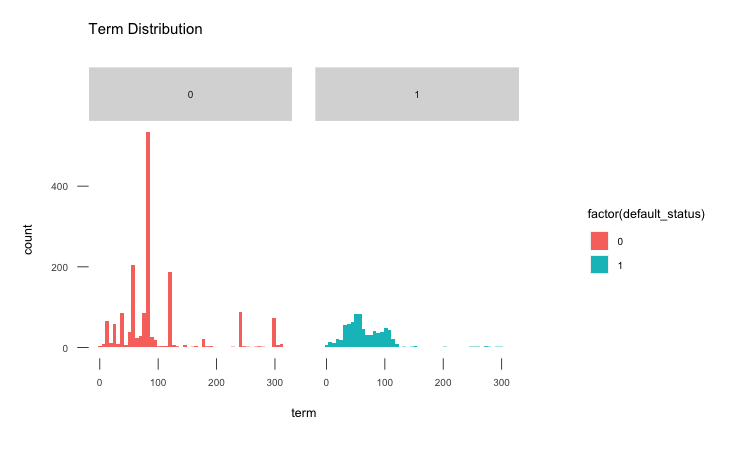

In [6]:
# term historgram
df %>%
ggplot(aes(x = term, fill = factor(default_status))) + 
geom_histogram(bins = 50) + 
facet_grid(~default_status) +
labs(title = 'Term Distribution') + 
nb.theme

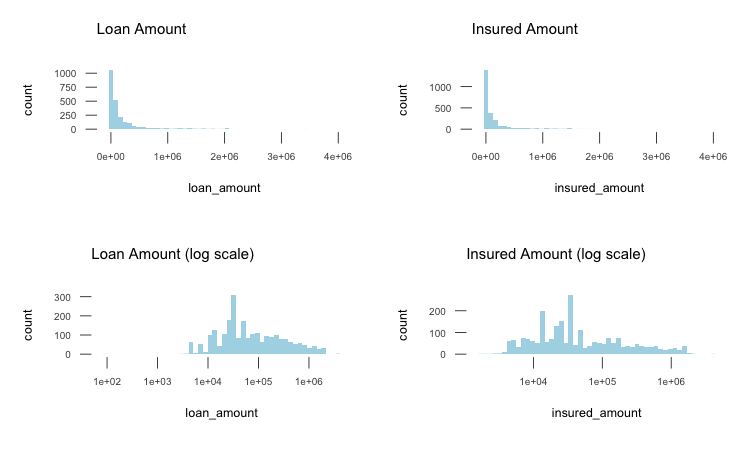

In [7]:
# loan amount and insured amount historgram
p1 <- df %>%
ggplot(aes(x = loan_amount)) + 
geom_histogram(bins = 50, fill = 'lightblue') + 
labs(title = 'Loan Amount') +
nb.theme

p2 <- df %>%
ggplot(aes(x = insured_amount)) + 
geom_histogram(bins = 50, fill = 'lightblue') + 
labs(title = 'Insured Amount') + 
nb.theme

p3 <- p1 + scale_x_log10() + labs(title = 'Loan Amount (log scale)')
p4 <- p2 + scale_x_log10() + labs(title = 'Insured Amount (log scale)')

ggarrange(p1,p2, p3,p4, ncol = 2, nrow = 2, common.legend = T)

Loan amount and Insured amount are both having skewed distribution

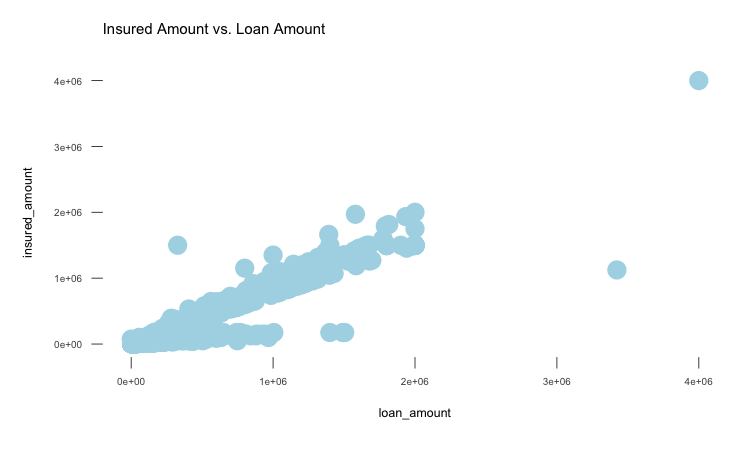

In [8]:
df %>%
ggplot(aes(x = loan_amount, y = insured_amount)) + 
geom_point(color = 'lightblue') +
labs(title = 'Insured Amount vs. Loan Amount') +
nb.theme

Insured Amount is postively correlated with Loan Amount

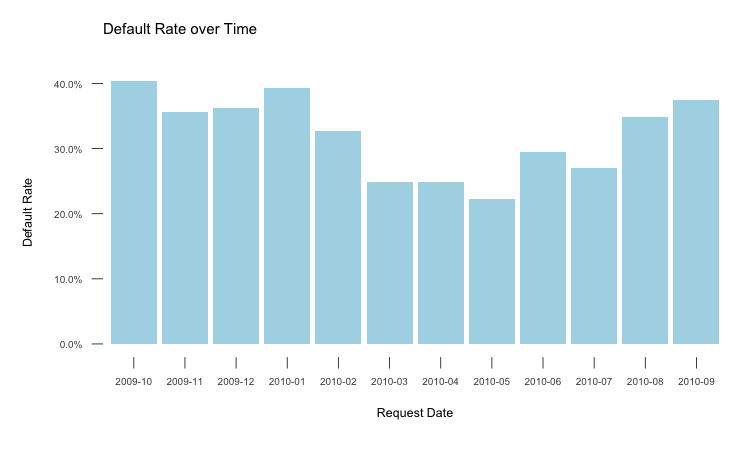

In [9]:
# default rate over time
df %>%
mutate(ym = format(request_date, '%Y-%m')) %>%
group_by(ym) %>%
summarise(default_rate = mean(default_status)) %>%
ggplot(aes(x = ym, y = default_rate)) +
geom_bar(stat = 'identity', fill = 'lightblue') +
scale_y_continuous(labels = scales::percent) + 
labs(title = 'Default Rate over Time', x = 'Request Date', y = 'Default Rate') +
nb.theme

Default rate is lower at from March to July

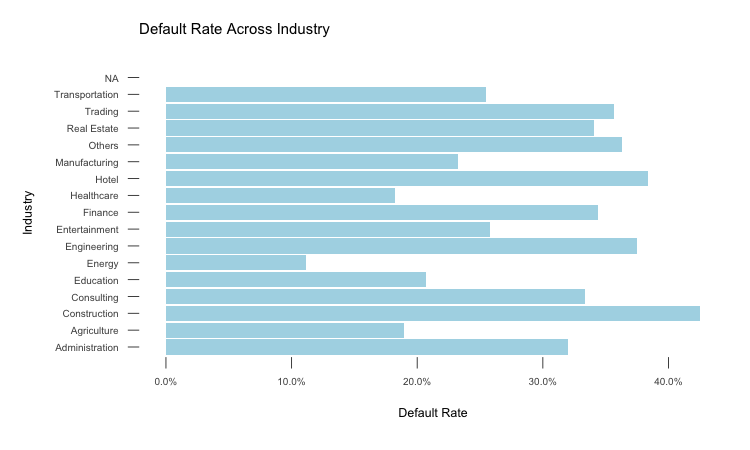

In [10]:
# Industry effect
df %>%
group_by(industry) %>%
summarise(default_rate = mean(default_status)) %>%
ggplot(aes(x = industry, y = default_rate)) +
geom_bar(stat = 'identity', fill = 'lightblue') +
scale_y_continuous(labels = scales::percent) + 
labs(title = 'Default Rate Across Industry', x = 'Industry', y = 'Default Rate') +
coord_flip() + 
nb.theme

Construction industry has highest default rate, while energy industry has the lowest

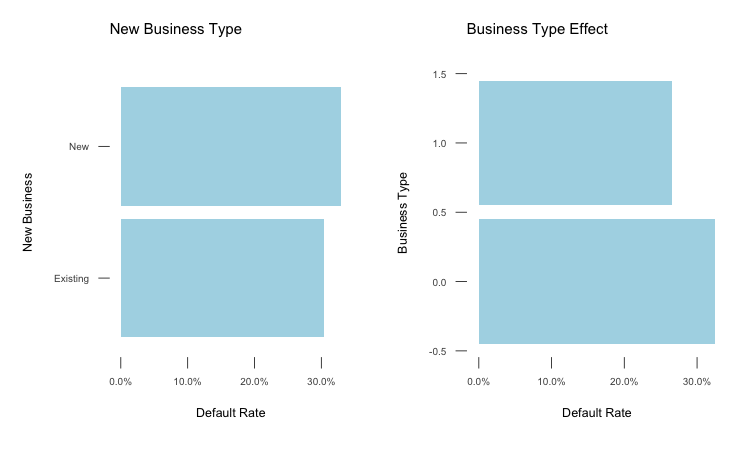

In [11]:
# New business effect
p1 <- df %>%
group_by(business_new) %>%
summarise(default_rate = mean(default_status)) %>%
ggplot(aes(x = business_new, y = default_rate)) +
geom_bar(stat = 'identity', fill = 'lightblue') +
scale_y_continuous(labels = scales::percent) + 
labs(title = 'New Business Type', x = 'New Business', y = 'Default Rate') +
coord_flip() + 
nb.theme

p2 <- df %>%
group_by(business_type) %>%
summarise(default_rate = mean(default_status)) %>%
ggplot(aes(x = business_type, y = default_rate)) +
geom_bar(stat = 'identity', fill = 'lightblue') +
scale_y_continuous(labels = scales::percent) + 
labs(title = 'Business Type Effect', x = 'Business Type', y = 'Default Rate') +
coord_flip() + 
nb.theme

ggarrange(p1,p2, ncol = 2, common.legend = T)

New business tends to have higher default rate

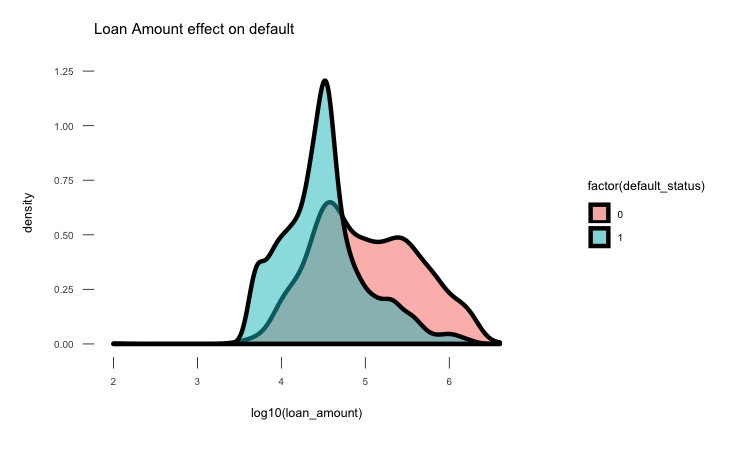

In [12]:
# Loan Amount effect on default
df %>%
ggplot(aes(x = log10(loan_amount), fill = factor(default_status))) +
geom_density(alpha = 0.5) +
labs(title = 'Loan Amount effect on default')+
nb.theme

Lower loan amount tends to have high default rate

# 5. Build Predictive Models

## 5.1 Linear Model - Logistic Regression Baseline

In [13]:
library(h2o)
h2o.init(nthreads = 4, max_mem_size = '4g')


----------------------------------------------------------------------

Your next step is to start H2O:
    > h2o.init()

For H2O package documentation, ask for help:
    > ??h2o

After starting H2O, you can use the Web UI at http://localhost:54321
For more information visit http://docs.h2o.ai

----------------------------------------------------------------------


Attaching package: ‘h2o’

The following objects are masked from ‘package:data.table’:

    hour, month, week, year

The following objects are masked from ‘package:stats’:

    cor, sd, var

The following objects are masked from ‘package:base’:

    %*%, %in%, &&, apply, as.factor, as.numeric, colnames, colnames<-,
    ifelse, is.character, is.factor, is.numeric, log, log10, log1p,
    log2, round, signif, trunc, ||




H2O is not running yet, starting it now...

Note:  In case of errors look at the following log files:
    /var/folders/ls/dkfz4pv528l6krssxvsc2y1m0000gn/T//RtmpDxglod/h2o_xuelin_started_from_r.out
    /var/folders/ls/dkfz4pv528l6krssxvsc2y1m0000gn/T//RtmpDxglod/h2o_xuelin_started_from_r.err


Starting H2O JVM and connecting: ... Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         4 seconds 697 milliseconds 
    H2O cluster timezone:       Asia/Shanghai 
    H2O data parsing timezone:  UTC 
    H2O cluster version:        3.26.0.2 
    H2O cluster version age:    2 months and 13 days  
    H2O cluster name:           H2O_started_from_R_xuelin_ppi389 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   3.56 GB 
    H2O cluster total cores:    4 
    H2O cluster allowed cores:  4 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 

In [14]:
# combine train and valid before convert to factor
df$flag <- 'train'
df.test <- fread('./data/test.csv', na.strings = '') %>%
    clean_data() %>%
    mutate(default_status= 0, flag = 'test')
df.full <- rbind(df, df.test)

In [15]:
# create feature from request date
df.full <- df.full %>%
    mutate(request_ym = format(request_date, '%Y-%m'))

In [16]:
# convert data.table to h2o.frame
full.hex <- as.h2o(df.full)

# convert categorical variables to factor
full.hex$label <- h2o.asfactor(full.hex$default_status)
full.hex$industry <- h2o.asfactor(full.hex$industry)
full.hex$state <- h2o.asfactor(full.hex$state)
full.hex$business_new <- h2o.asfactor(full.hex$business_new)
full.hex$other_loans <- h2o.asfactor(full.hex$other_loans)
full.hex$request_ym <- h2o.asfactor(full.hex$request_ym)

# split train, test
train.hex <- full.hex[full.hex$flag == 'train',]
test.hex <- full.hex[full.hex$flag == 'test',]

  |======================================================================| 100%


In [17]:
# define feature set
feature.names <- c('industry',
                   'state', 
                   'term', 
                   'employee_count', 
                   'request_ym',
                   'business_new', 
                   'business_type', 
                   'other_loans',
                   'loan_amount',
                   'insured_amount')

In [18]:
model_ridge <- h2o.glm(x = feature.names, y = 'label', training_frame = train.hex, 
                       family= 'binomial',
                       nfolds = 5, alpha = 0, lambda_search = T)

  |======================================================================| 100%


In [19]:
# auc
h2o.auc(model_ridge, train = T, xval = T)

train      xval 
0.8096337 0.7793069

In [20]:
# accuracy at threshold = 0.5 for train and cross validation
model_ridge_perf_train <- h2o.performance(model_ridge, train = T)
model_ridge_perf_cv <- h2o.performance(model_ridge, xval = T)

acc <- c(h2o.accuracy(model_ridge_perf_train, thresholds = 0.5),
         h2o.accuracy(model_ridge_perf_cv, thresholds = 0.5))
names(acc) <- c('train','xval')
acc

Warning message in h2o.find_row_by_threshold(object, t):
“Could not find exact threshold: 0.5 for this set of metrics; using closest threshold found: 0.500396224771984. Run `h2o.predict` and apply your desired threshold on a probability column.”Warning message in h2o.find_row_by_threshold(object, t):
“Could not find exact threshold: 0.5 for this set of metrics; using closest threshold found: 0.500749868812473. Run `h2o.predict` and apply your desired threshold on a probability column.”

$train
[1] 0.7527061

$xval
[1] 0.7293922

In [21]:
h2o.varimp(model_ridge) %>% head(20)

variable,relative_importance,scaled_importance,percentage
<fct>,<dbl>,<dbl>,<dbl>
state.AZ,0.9332668,1.0000000,0.04034124
term,0.8162582,0.8746247,0.03528345
state.GA,0.7941603,0.8509466,0.03432824
loan_amount,0.7493312,0.8029121,0.03239047
industry.Agriculture,0.7465786,0.7999626,0.03227149
employee_count,0.7084893,0.7591498,0.03062505
industry.Hotel,0.6492611,0.6956864,0.02806485
state.MA,0.5649461,0.6053425,0.02442027
state.FL,0.5472855,0.5864191,0.02365687


## 5.2 Xgboost Model - Tree based Ensemble Model

In [22]:
model_xgb <- h2o.xgboost(x = feature.names, y = 'label', training_frame = train.hex, 
                         max_depth = 6, eta = 0.1, 
                         stopping_metric = 'AUC', stopping_rounds = 21, ntrees = 500,
                         nfolds = 5)

  |======================================================================| 100%


In [23]:
# auc
h2o.auc(model_xgb, train = T, xval = T)

train      xval 
0.9999944 0.9553369

In [24]:
# accuarcy
# accuracy at threshold = 0.5 for train and cross validation
model_xgb_perf_train <- h2o.performance(model_xgb, train = T)
model_xgb_perf_cv <- h2o.performance(model_xgb, xval = T)

acc <- c(h2o.accuracy(model_xgb_perf_train, thresholds = 0.5),
         h2o.accuracy(model_xgb_perf_cv, thresholds = 0.5))
names(acc) <- c('train','xval')
acc

Warning message in h2o.find_row_by_threshold(object, t):
“Could not find exact threshold: 0.5 for this set of metrics; using closest threshold found: 0.5059694647789. Run `h2o.predict` and apply your desired threshold on a probability column.”Warning message in h2o.find_row_by_threshold(object, t):
“Could not find exact threshold: 0.5 for this set of metrics; using closest threshold found: 0.498298853635788. Run `h2o.predict` and apply your desired threshold on a probability column.”

$train
[1] 0.9991674

$xval
[1] 0.9050791

In [25]:
h2o.varimp(model_xgb) %>% head(20)

variable,relative_importance,scaled_importance,percentage
<chr>,<dbl>,<dbl>,<dbl>
term,7989.54883,1.000000000,0.541550700
loan_amount,3008.10596,0.376505110,0.203896606
insured_amount,1487.70435,0.186206302,0.100840154
employee_count,629.24750,0.078758827,0.042651898
other_loans.N,279.79691,0.035020364,0.018965302
industry.Trading,114.16731,0.014289582,0.007738533
business_new.Existing,95.52361,0.011956071,0.006474819
industry.Hotel,88.76849,0.011110576,0.006016940
state.GA,76.73910,0.009604935,0.005201559


## 5.3 Model Selection
Xgboost model is much better than Logistic Regression in terms of AUC and Accuracy. Therefore, xgboost model is used for prediction

In [26]:
# make prediction using xgboost
preds <- predict(model_xgb, test.hex)
preds

  |======================================================================| 100%


  predict         p0           p1
1       1 0.41499990 5.850001e-01
2       0 0.99995303 4.698567e-05
3       0 0.99324828 6.751708e-03
4       0 0.76375610 2.362439e-01
5       0 0.99935484 6.451412e-04
6       1 0.01799911 9.820009e-01

[601 rows x 3 columns] 

In [29]:
# add id for prediction
submission <- h2o.cbind(test.hex$id, preds$predict)
submission

          id predict
1 3999155010       1
2 4035035009       0
3 3889475000       0
4 3794845001       0
5 4163475006       0
6 4248455010       1

[601 rows x 2 columns] 

In [30]:
# convert h2o frame to data.frame
submission <- submission %>%
as.data.frame() %>%
rename(default_status = predict)
head(submission)

id,default_status
<dbl>,<fct>
3999155010,1
4035035009,0
3889475000,0
3794845001,0
4163475006,0
4248455010,1


In [31]:
# write submission to csv
fwrite(submission, 'submissions_xuelin.csv')

In [32]:
h2o.shutdown(prompt = F)

[1] TRUE